# image manipulation in python
a notebook to learn a few basics about image manipulation

the first snippet of code is to check whether packages that we need are installed and it will install these when not found

In [1]:
import importlib.metadata, subprocess, sys
required  = {'aicsimageio', 'scikit-image', 'numpy==1.26.3'
}
installed = {pkg.metadata['Name'] for pkg in importlib.metadata.distributions()}
missing   = required - installed

if missing:
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', '--upgrade', 'pip'])
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', *missing])

next we will load the packages that we need

In [17]:
from matplotlib import pyplot as plt
import numpy as np
from aicsimageio import AICSImage
from skimage.io import imshow
from skimage.filters import gaussian, threshold_otsu, median

## load and display an image
next we will load an image, i.e. an nd2 file (Nikon's file format)

In [2]:
# load an nd2 file
img = AICSImage('../data/nd2/WT_001.nd2')
data = img.get_image_data("TCZYX")  # Choose the correct dimension order
data.shape

(1, 3, 1, 1200, 1600)

after that let's display the image to see what we are working with

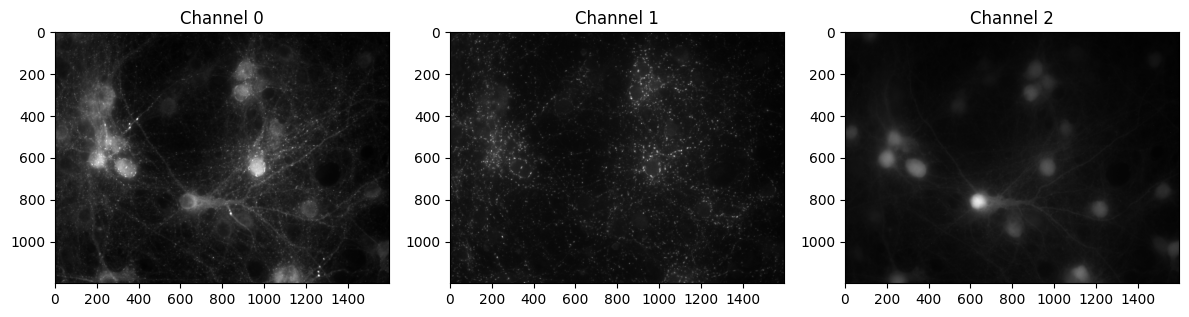

In [30]:
# Pick the first timepoint and z-slice
t_index = 0
z_index = 0

# Extract each channel slice (assume 3 channels, for example)
channel_0 = data[t_index, 0, z_index, :, :]
channel_1 = data[t_index, 1, z_index, :, :]
channel_2 = data[t_index, 2, z_index, :, :]

# make a quick figure to display individual channels
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(channel_0, cmap='gray')
axes[0].set_title("Channel 0")

axes[1].imshow(channel_1, cmap='gray')
axes[1].set_title("Channel 1")

axes[2].imshow(channel_2, cmap='gray')
axes[2].set_title("Channel 2")

plt.tight_layout()
plt.show()

as you can see x- and y- coordinates are displayed in pixel numbers, we can write a function to retrieve the actual dimensions from the image's metadata

In [4]:
# extract meta data, i.e. size of voxel in µm
def get_voxel_size_from_aics_image(aics_image):
    return (aics_image.physical_pixel_sizes.Z,
            aics_image.physical_pixel_sizes.Y,
            aics_image.physical_pixel_sizes.X)

we can call the function by its name and run input an image

In [6]:
voxel = get_voxel_size_from_aics_image(img)

voxel

(1.0, 0.17619047619047573, 0.17619047619047573)

since we are working with a single image plane, z has no meaning and each pixel is 0.176.. µm

we can use these numbers now to calculate the dimensions of our image

In [7]:
x_dimension = data.shape[4] * voxel[1]
y_dimension = data.shape[3] * voxel[1]

print(f"length in x: {x_dimension:.2f} µm")
print(f"length in y: {y_dimension:.2f} µm")

length in x: 281.90 µm
length in y: 211.43 µm


## basic image transformations
let's learn some basic image transformations, we will be using image filters scikit-image, to start with, we will be working with a single channel for simplicity

In [25]:
gphn = channel_0
gphn.shape

(1200, 1600)

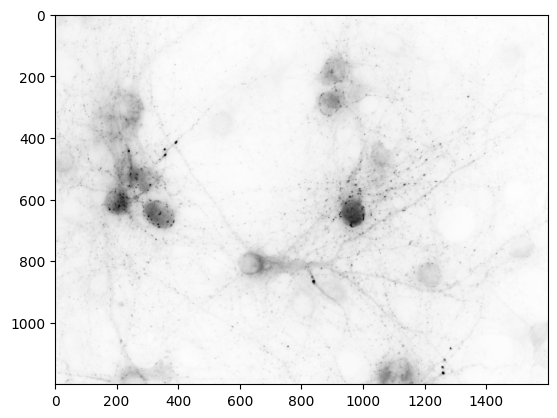

In [31]:
plt.imshow(gphn, cmap='Greys')

next we will use a Gaussian filter and display the resulting image in order to smooth the image

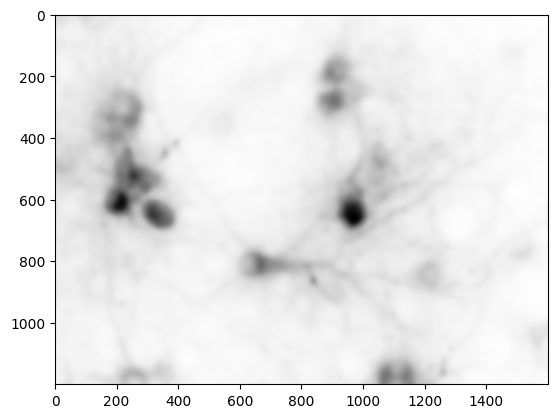

In [32]:
high = gaussian(gphn, sigma=10)
plt.imshow(high, cmap='Greys')

in this smooth image, gephyrin clusters cannot be seen, finally we will apply two gaussian filters (separately) and then subtract these images (pixel by pixel) from one another, this is called difference of Gaussians (DoG) and this method can be used to enhance certain features of an image

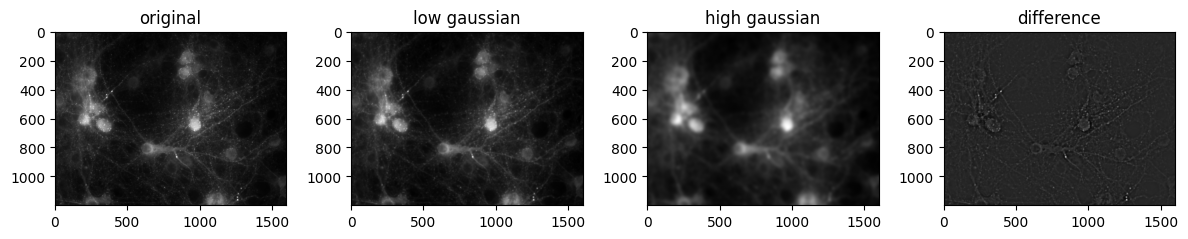

In [44]:
# Process Gphn channel (Difference of Gaussian)
low = gaussian(gphn, sigma=2)
high = gaussian(gphn, sigma=10)
dog = low - high

# make a quick figure for display
fig, axes = plt.subplots(1, 4, figsize=(12, 4))

axes[0].imshow(gphn, cmap='gray')
axes[0].set_title("original")

axes[1].imshow(low, cmap='gray')
axes[1].set_title("low gaussian")

axes[2].imshow(high, cmap='gray')
axes[2].set_title("high gaussian")

axes[3].imshow(dog, cmap='gray')
axes[3].set_title("difference")

plt.tight_layout()
plt.show()

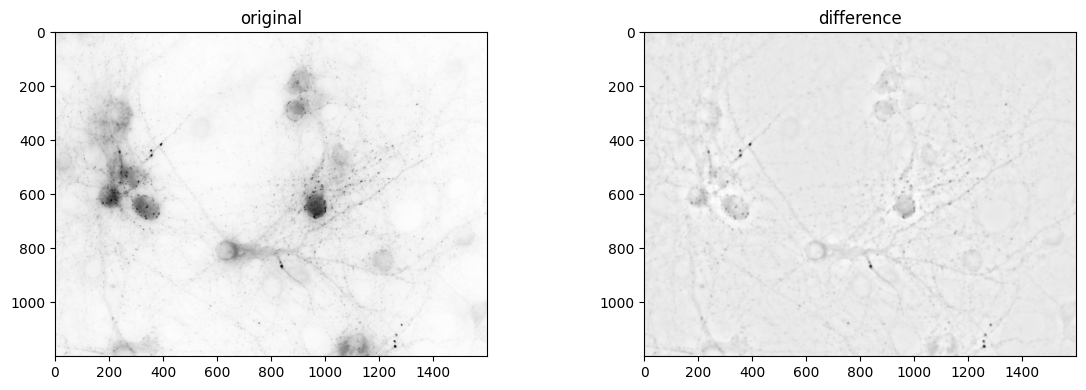

In [43]:
# make a quick figure to display individual channels
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].imshow(gphn, cmap='Grays')
axes[0].set_title("original")

axes[1].imshow(dog, cmap='Grays')
axes[1].set_title("difference")

plt.tight_layout()
plt.show()
